# Fluent plot examples

In [1]:
from yo_ds__tests.common import *
class TestCase:
    pass
import seaborn
import math

class TestFluentPlot(TestCase):
    def test_1_simple(self):
        df = Query.en(range(10)).select(lambda z: Obj(x=z,y=z*z)).to_dataframe()
        return df.feed(FluentPlot().call_ax(lambda z: z.plot).args(df.x,df.y).labels('Simplest fluent plot'))

    def test_2_3rdparty(self):
        df = Query.combinatorics.grid(x=range(5),y=range(5)).select(lambda z: z.update(z=z.x+z.y)).to_dataframe().pivot_table(columns='x',index='y',values='z')
        return df.feed(FluentPlot().call(seaborn.heatmap).args(data=df).labels('Fluent plot over 3rd party member from seaborn'))

    def test_3_tuning(self):
        df = Query.en(range(10)).select(lambda z: Obj(x=z, y=z * z)).to_dataframe()
        return df.feed(FluentPlot()
                       .call_ax(lambda z: z.plot)
                       .args(df.x,df.y,label='test')
                       .labels('Plot with cosmetic tuning','X axis','Y axis')
                       .with_legend()
                       .tune(lambda ax: ax.tick_params(axis='x', rotation=45))
                       )


    def test_4_groupby_plot(self):
        df = Query.combinatorics.grid(a=range(5),x=range(10)).select(lambda z: z.update(y=z.x*z.a)).to_dataframe()
        return df.groupby('a').feed(FluentPlot()
                                    .call_ax(lambda z: z.plot)
                                    .args(lambda gr: gr[1].x, lambda gr: gr[1].y, label = lambda gr: gr[0])
                                    .labels('Plot built for groupby')
                                    .iterate()
                                    .with_legend())


    def test_5_df_columns_plot(self):
        df = Query.combinatorics.grid(x=range(5), y=range(5)).select(lambda z: z.update(z=z.x + z.y)).to_dataframe().pivot_table(columns='x', index='y', values='z')
        return df.feed(FluentPlot()
                       .call_ax(lambda z: z.plot)
                       .args(lambda z: z.index, lambda z: z, label = lambda z: z.name)
                       .iterate_df_columns()
                       .labels('Plot build for dataframe columns')
                       .with_legend())


    def test_6_plots_on_different_axes(self):
        df = Query.en(range(10)).select(lambda z: Obj(x=z, pow=z*z, sqrt=math.sqrt(z))).to_dataframe().set_index('x')
        (Query
         .en(df.columns)
         .feed(fluq.with_plots(columns=2))
         .foreach(lambda p: df[p.item].feed(FluentPlot()
                                            .call_ax(lambda ax: ax.plot)
                                            .args(lambda z: z.index, lambda z: z)
                                            .on(p.ax)
                                            )))

    def test_7_plot_from_series(self):
        series = pd.Series([5,4,3,2,1])
        series.feed(FluentPlot().call_obj(lambda obj: obj.plot).args().size(20,10))


    def test_8_plot_from_df(self):
        df = Query.en(range(10)).select(lambda z: Obj(x=z, pow=z * z, sqrt=math.sqrt(z))).to_dataframe().set_index('x')
        df.feed(FluentPlot().call_obj(lambda z: z.plot).args().iterate_df_columns())
tc = TestFluentPlot()

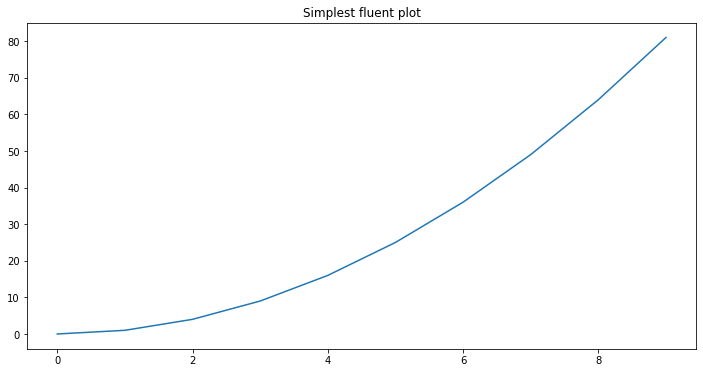

In [2]:
tc.test_1_simple()

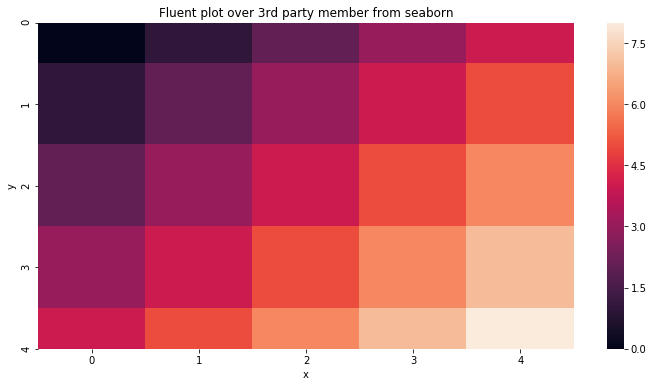

In [3]:
tc.test_2_3rdparty()

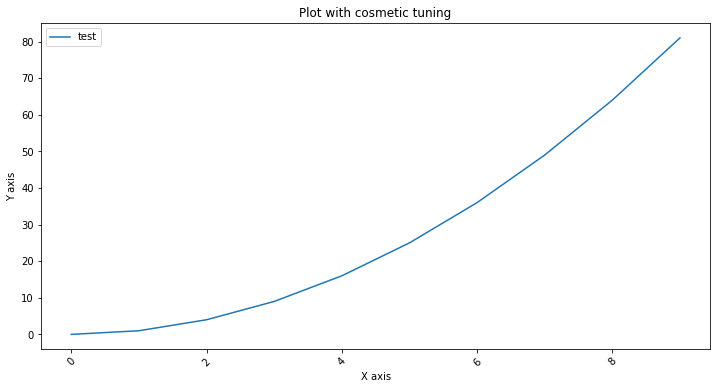

In [4]:
tc.test_3_tuning()

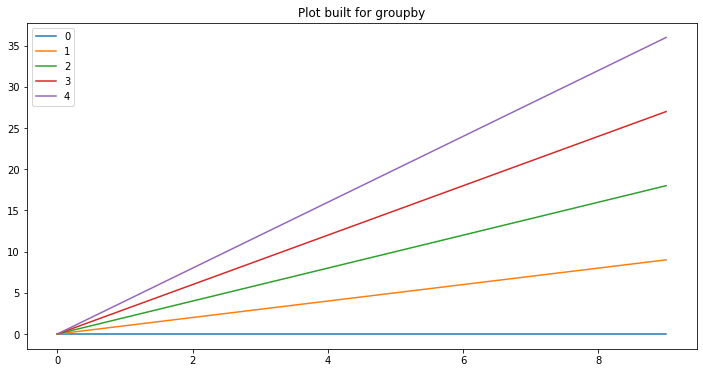

In [5]:
tc.test_4_groupby_plot()

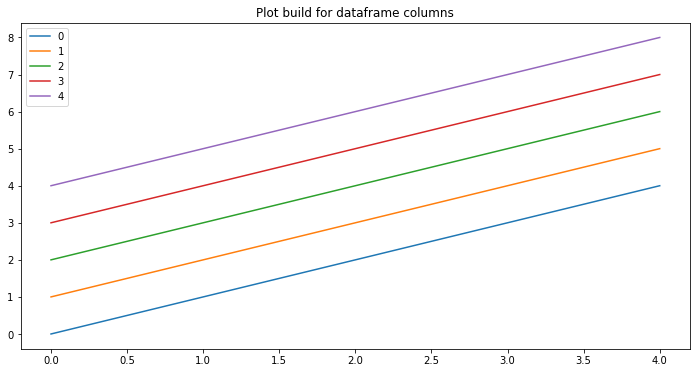

In [6]:
tc.test_5_df_columns_plot()

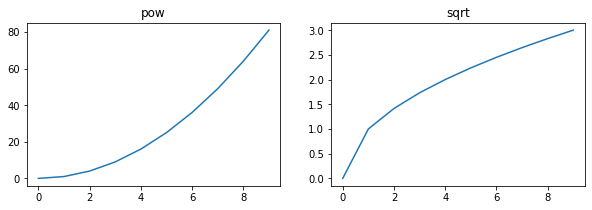

In [7]:
tc.test_6_plots_on_different_axes()

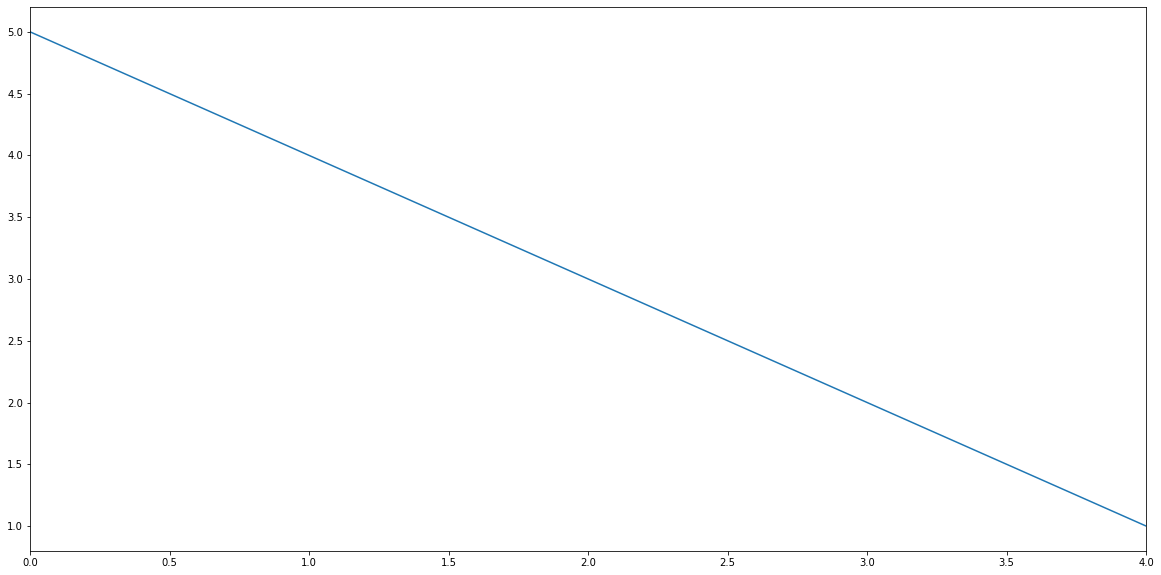

In [8]:
tc.test_7_plot_from_series()

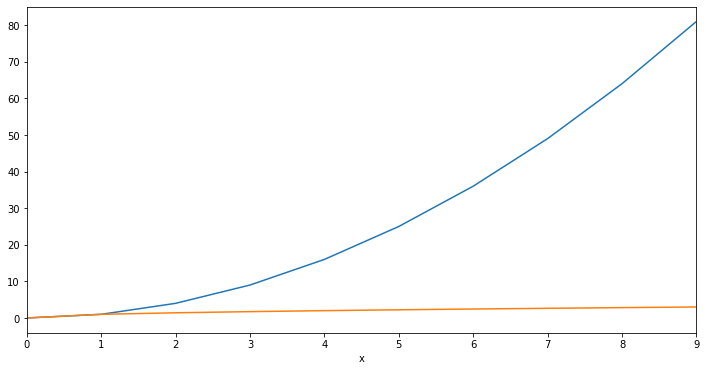

In [9]:
tc.test_8_plot_from_df()

# GRBAR plot examples

In [10]:
from yo_ds__tests.common import *
class TestCase:
    pass

def _get_df():
    df = Query.combinatorics.grid(x=range(5), a=range(5)).select(lambda z: z.update(y=z.x + z.a, err=z.a/2)).to_dataframe()
    return df

class TestGrBar(TestCase):
    def test_1_simple(self):
        df = _get_df()
        grbar_plot(df,'y','a','x')

    def test_2_error(self): # TODO: does not work
        df = _get_df()
        grbar_plot(df,'y','a','x','err')


    def test_3_value_caption(self):
        df = _get_df()
        grbar_plot(df,'y','a','x','err',value_format='{0:.2f}±{1:.2f}')

    def test_4_custom_caption(self):
        df = _get_df()
        df = df.assign(caption=df.y)
        grbar_plot(df,'y','a','x',None,'caption')


    def test_5_witout_groups(self):
        df= _get_df()
        df = df.loc[df.a==1]
        grbar_plot(df,'y','x',None)

    def test_6_without_colors(self):
        df = _get_df()
        df = df.loc[df.a==1]
        grbar_plot(df,'y',None,'x')

    def test_7_orient_h(self):
        df = _get_df()
        grbar_plot(df,'y','a','x',orient='h')
tc = TestGrBar()

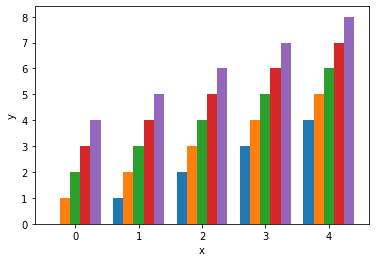

In [11]:
tc.test_1_simple()

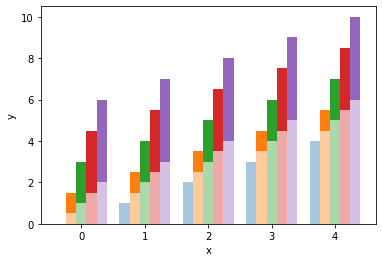

In [12]:
tc.test_2_error()

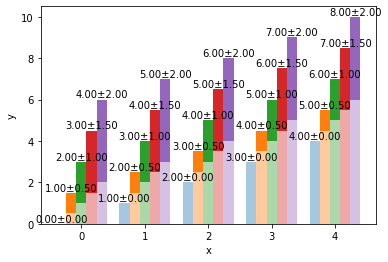

In [13]:
tc.test_3_value_caption()

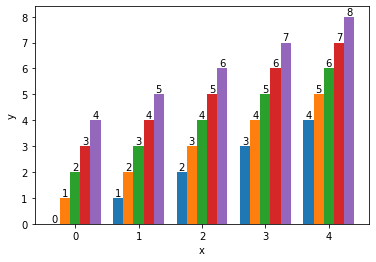

In [14]:
tc.test_4_custom_caption()

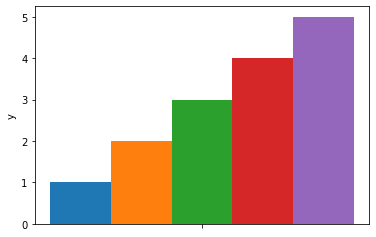

In [15]:
tc.test_5_witout_groups()

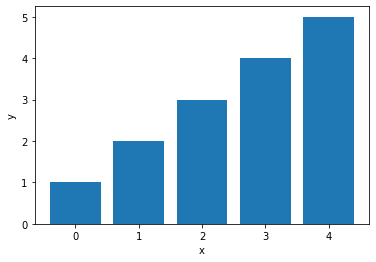

In [16]:
tc.test_6_without_colors()

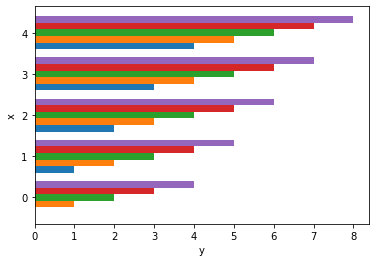

In [17]:
tc.test_7_orient_h()

# Other plots examples

In [18]:
from yo_ds__tests.common import *
class TestCase:
    pass

class TestOtherPlots(TestCase):
    def test_pie(self):
        series = Query.en(range(1,5)).to_series()
        pie_plot(series)

    def test_roc_auc(self):
        true = [0,0,0,0,0,1,1,1]
        pred = [0.1,0.3,0.5,0.7,0.4,0.6,0.8, 0.8]
        return roc_plot(true,pred)
tc = TestOtherPlots()

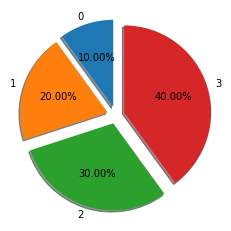

In [19]:
tc.test_pie()

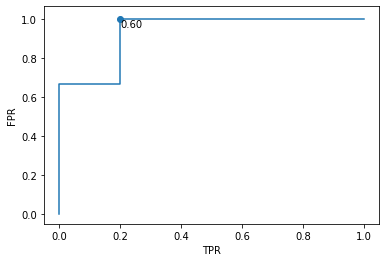

In [20]:
tc.test_roc_auc()